# **Comparative Predictive Analysis of U.S. Electricity Price**

## **Business Problem and Objectives**

Comparative Predictive Analysis Electricity Price in the Southern United States” project would utilize XGBoost, Random Forest (RF), and Linear Regression (LR) machine learning model, and Multilayer Perceptron (MLP) deep learning model, **it aims to offer valuable insights for energy policy, investor, and consumer planning in south region of the U.S.**

## **Technique Used**

- **Aggregation (Mean)**: Calculating the average value of variables.
- **Handling the Outlier**: Identifying and managing extreme values that differ significantly from other data points.
- **Handling Missing Value (IQR)**: sing the interquartile range method to detect and possibly impute or remove missing data points.
- Boxplot: A graphical representation to visualize data distribution and identify outliers.
- **Train Test Split**: Dividing data into training and testing sets to evaluate model performance.
- **Scalling**: Normalizing or standardizing data features to bring them onto a comparable scale.
- **Machine Learning**: A field of artificial intelligence that enables computers to learn patterns from data and make predictions or decisions without explicit programming.
- **Deep Learning**: A subset of machine learning involving neural networks with many layers that can automatically learn representations from large amounts of data.
- **Performance Metrics**: Quantitative measures used to evaluate the accuracy, efficiency, and effectiveness of a model.
- **Linear Regression**: A statistical method that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.
- **Random Fores**t: An ensemble learning method that builds multiple decision trees and merges their results to improve prediction accuracy and control overfitting.
- **XGBoost**: A powerful gradient boosting algorithm that builds an ensemble of decision trees sequentially to optimize predictive accuracy.
- **Multi Layer Perceptron**: A type of artificial neural network composed of multiple layers of neurons that can learn complex patterns through nonlinear transformations and backpropagation.
- **Visualization**: The process of creating graphical representations of data, models, or results to facilitate understanding, interpretation, and communication.

## **Variables**

- **year** The year of the observation
- **month** The month of the observation
- **stateDescription** The name of the state
- **sectorName** The sector of the electricity market (residential, commercial, industrial, other, or all sectors)
- **customers** The number of customers (missing for some observations)
- **price** The average price of electricity per kilowatt-hour (kWh) in cents
- **revenue** The total revenue generated from electricity sales in millions of dollars
- **sales** The total electricity sales in millions of kilowatt-hours (kWh)

Source: https://www.kaggle.com/datasets/alistairking/electricity-prices

## **Utilized Performance Metrics**
- **R2 Score:** Measures how well a regression model's predictions fit the actual data, showing the proportion of variance explained by the model; values closer to 1 indicate better fit.
- **Mean Absolute Percentage Error(MAPE):** Represents the average percentage difference between predicted and actual values; it indicates prediction accuracy in percentage terms.
- **Mean Absolute Error(MAE):** Measures the average absolute difference between predicted and actual values, reflecting overall prediction error in the same units as the target variable.
- **Mean Squared Error (MSE):** Represents the average of squared differences between predicted and actual values; it gives higher weight to larger errors.
- **Root Mean Squared Error (RMSE):** The square root of MSE; it provides error magnitude in the same units as the target variable and is sensitive to large errors.

## **Key Insights**

- The comparison between Machine Learning (ML) and Deep Learning in this project demonstrates that Linear Regression (LR) achieves modest error metrics—specifically, a Mean Absolute Percentage Error (MAPE) of 3.07%, a Mean Absolute Error (MAE) of 0.41, and a Mean Squared Error (MSE) of 0.29. **These values indicate that LR performs better than other other predictive model tested.**

- Although Linear Regression employs a simpler underlying logic compared to more complex models, it does not imply that its performance is inferior. **In fact, for this project, the dataset’s aggregate characteristics contribute to the effectiveness of LR.** The data structure suggests that there is no compelling need to use advanced or computationally intensive algorithms for prediction.

### **Import and Read the data**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## **Data Pre Processing**

## **State the South and West Areas**

In this project, i decided to analyst south areas because based on Statista, Texas, California, and Florida were identified as the highest power consumers. While the residential sector has consistently maintained the highest electricity consumption, surpassing all other sectors.

Source: https://www.statista.com/statistics/560913/us-retail-electricity-consumption-by-major-state/ & https://www.statista.com/statistics/183700/us-average-retail-electricity-price-since-1990/

In [3]:
data = pd.read_csv('clean_data.csv')
data_south = data[(data['stateDescription'].isin(['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Verginia'])) & (data['sectorName']=='residential')]
data_west = data[(data['stateDescription'].isin(['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'])) & (data['sectorName']=='residential')]

## **Merging the Data**

- In this project, data aggregation was employed by grouping each variable individually and then calculating the mean for each group. This approach simplified the dataset by reducing noise, **the model can focus on overall patterns rather than being influenced by individual data point fluctuations.**
- Though, this simplification comes with some fallbacks. **Aggregation may cause the loss of important granular details and variability within the original dataset.**

In [4]:
def merging_data(data):
    df = data[['year', 'month', 'price', 'revenue', 'sales']].groupby(by=['year', 'month']).mean()
    df = df.reset_index()
    return df 

data = merging_data(data_south)
data

,year,month,price,revenue,sales
0,2001,1,6.937333,294.523411,4112.963935
1,2001,2,7.218667,227.692668,3053.375531
2,2001,3,7.530000,205.364621,2655.424297
3,2001,4,7.640000,197.104397,2501.512929
4,2001,5,7.883333,205.677189,2520.243609
...,...,...,...,...,...
272,2023,9,13.982000,681.054949,4777.781362
273,2023,10,14.360667,507.853797,3507.118867
274,2023,11,13.960667,455.891024,3221.665121
275,2023,12,13.508000,511.953898,3715.964474


## **Checking the Missing Value**

In [5]:
data.isna().sum()

year       0
month      0
price      0
revenue    0
sales      0
dtype: int64

## **Handling the Outlier**

## **Before Handling the Outlier**

- Handling outlier is essential for maintaining data integrity, improving model performance, and ensuring statistical validity. Using a IQR method for this purpose is advantageous due to its imputation capabilities, robustness, and ability to capture complex relationships in the data. 

- **IQR technique is employed to identify and manage outliers effectively.** The IQR is calculated by finding the difference between the third quartile (Q3) and the first quartile (Q1) of the dataset, which represents the middle 50% of the data.

Column price Before handling outliers
Column revenue Before handling outliers
Column sales Before handling outliers


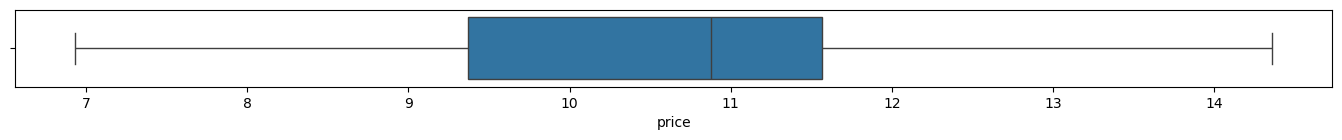

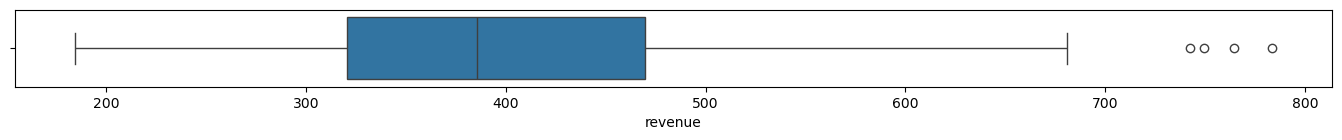

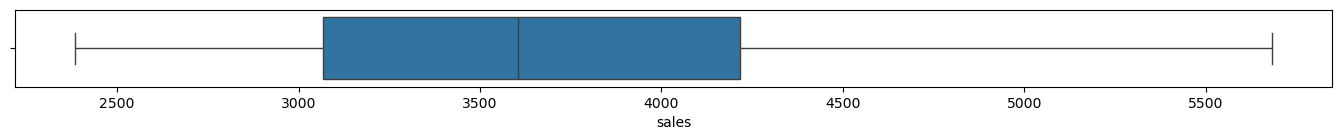

In [6]:
for i in ["price","revenue", "sales"]:
    print(f"Column {i} Before handling outliers")
    plt.figure(figsize = (17,1))
    sns.boxplot(data, x = i)

In [7]:
def handling_outlier(data, k, method = "cap"):     
    for column in ["price","revenue", "sales"]:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + (k * iqr)
        lower_bound = q1 - (k*iqr)
        
        if method == 'remove':
            data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
        elif method == 'cap':
            data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
        elif method == 'transform':
            data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return data
        
data_handling_outlier =  handling_outlier(data, 1.5)
data_handling_outlier

,year,month,price,revenue,sales
0,2001,1,6.937333,294.523411,4112.963935
1,2001,2,7.218667,227.692668,3053.375531
2,2001,3,7.530000,205.364621,2655.424297
3,2001,4,7.640000,197.104397,2501.512929
4,2001,5,7.883333,205.677189,2520.243609
...,...,...,...,...,...
272,2023,9,13.982000,681.054949,4777.781362
273,2023,10,14.360667,507.853797,3507.118867
274,2023,11,13.960667,455.891024,3221.665121
275,2023,12,13.508000,511.953898,3715.964474


## **After Handling the Outlier**

Before handling the outliers, I observed that the revenue variables contained outliers. These outlier values have now been transformed using the IQR method, resulting in new adjusted values.

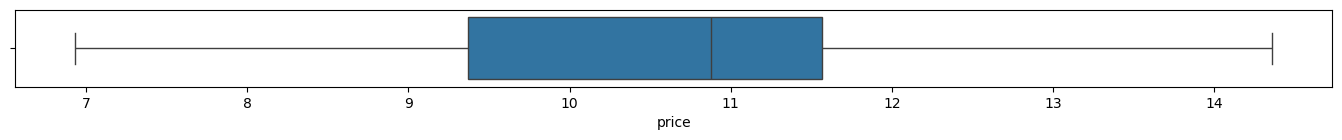

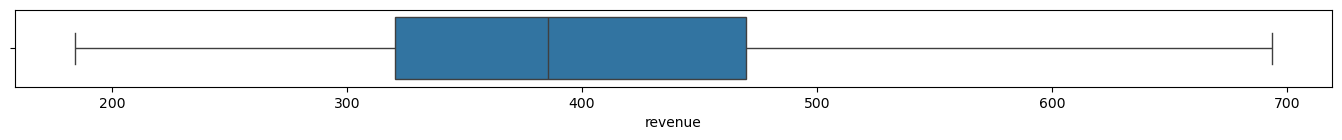

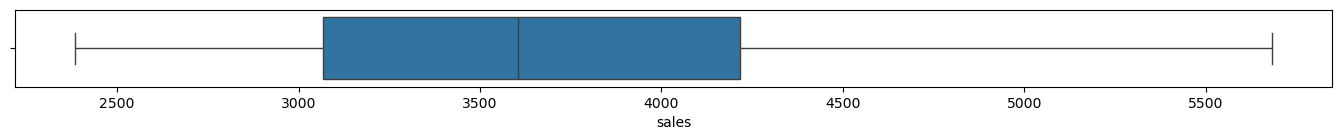

In [8]:
for i in ["price","revenue", "sales"]:
    plt.figure(figsize = (17,1))
    sns.boxplot(data_handling_outlier, x = i)

## **Train Test Split and Scalling**

- The trend test split is a step used to assess and validate the performance of predictive models over different time periods. **This approach is particularly important in time series data, where trends are the key.**
- While Scaling is a technique of transforming data to fit within a specific range or scale, which is crucial for enhancing the performance accuracy of machine learning models standard scaler, and normalization. In this project **I utilize robust scaller due to Highly resistant to outliers because it does not use mean or standard deviation, which can be skewed by extreme values.**

In [9]:
def train_test_split_scalling(df, split_time, scaller):
    df['year_month'] = pd.to_datetime(df[['year', 'month']].assign(day=1)).dt.to_period('M')
    x_train = df.iloc[:len(df)-split_time, :]
    y_train = x_train["price"]
    x_train = x_train.drop(columns = "price")

    x_test = df.iloc[len(df)-split_time:, :]
    y_test = x_test["price"]
    x_test = x_test.drop(columns = "price")
    
    if scaller == "standard scaller":
        scaller = StandardScaler()
        
    elif scaller == "min max scaller":
        scaller = MinMaxScaler()
        
    elif scaller == "robut scaller":
        scaller = RobustScaler()
        
    scalling = scaller
    x_train_scalled = scalling.fit_transform (x_train.drop(columns = "year_month"))
    x_test_scalled = scalling.transform(x_test.drop(columns = "year_month"))

    return x_train_scalled,x_test_scalled,y_train,y_test,x_train,x_test

In [10]:
split_time = 24  
scaling_type = "robut scaller"
x_train_scalled,x_test_scalled,y_train,y_test,x_train,x_test = train_test_split_scalling(data_handling_outlier, split_time,scaling_type)

## **Machine Learning**

In [16]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

### **Linear Regression**

In [17]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
}

linear_regressor = LinearRegression()
grid_search = GridSearchCV(estimator=linear_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train_scalled, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_linear_regressor = grid_search.best_estimator_
predictions_linear = best_linear_regressor.predict(x_test_scalled)
predictions_linear = predictions_linear.tolist()

print(predictions_linear)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:  {'copy_X': True, 'fit_intercept': True}
[12.436662166908574, 12.689021572806926, 12.778364419093037, 13.276316112442736, 14.254343761071247, 13.471615176355915, 14.223088125736032, 14.864136938645604, 13.950432493980186, 13.59627868379757, 13.689646510961998, 14.00909741641497, 14.076061536107812, 13.705301795709786, 13.608825147182582, 13.8898384220487, 14.65316932806438, 13.839789281283172, 13.244513808509446, 15.318609024359315, 14.379902400584706, 13.850440719600844, 13.943630340202418, 14.320001838597655]


### **Random Forest**

In [18]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(x_train_scalled, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Use the best estimator to make predictions
best_rf_regressor = grid_search.best_estimator_
predictions_rf = best_rf_regressor.predict(x_test_scalled)
predictions_rf = predictions_rf.tolist()

print(predictions_rf)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
[11.439353333333338, 11.60073333333333, 12.058400000000006, 12.10142000000001, 12.06146666666667, 12.038993333333343, 12.112553333333345, 12.235133333333337, 12.47100666666667, 12.401753333333344, 11.811253333333337, 11.452113333333338, 11.532679999999996, 11.61519333333333, 12.051226666666674, 12.16898000000001, 12.082640000000003, 12.038993333333343, 12.112553333333345, 12.223313333333337, 12.449213333333333, 12.401213333333343, 11.81796666666667, 11.211006666666677]


### **XGBoost**

In [21]:
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_regressor = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(x_train_scalled, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_xgb_regressor = grid_search.best_estimator_
predictions_xgb = best_xgb_regressor.predict(x_test_scalled)
predictions_xgb = predictions_xgb.tolist()
print(predictions_xgb)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
[11.700085639953613, 12.077519416809082, 12.368616104125977, 12.347661972045898, 12.133943557739258, 11.94344711303711, 11.994620323181152, 12.484037399291992, 12.768706321716309, 12.501949310302734, 12.014142036437988, 11.905107498168945, 12.135822296142578, 12.17889404296875, 12.492332458496094, 12.627663612365723, 12.389677047729492, 11.94344711303711, 11.994620323181152, 12.20496940612793, 12.774365425109863, 12.5159330368042, 12.006868362426758, 11.46037483215332]


### **MLP (Multi-Layer Perceptron)**

In [22]:
from sklearn.neural_network import MLPRegressor

param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [200, 500, 1000]
}

mlp_regressor = MLPRegressor(random_state=42)

grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(x_train_scalled, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_mlp_regressor = grid_search.best_estimator_
predictions_mlp = best_mlp_regressor.predict(x_test_scalled)
predictions_mlp = predictions_mlp.tolist()

print(predictions_mlp)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}
[11.804761979395966, 11.934300869459678, 11.98864495652692, 12.04674829383302, 12.006638106417235, 11.788991918629206, 11.922040866313809, 12.147094395778275, 12.184686476649427, 12.149934415365898, 12.088466482894898, 11.965185408853376, 12.075706370599018, 12.085295574594609, 12.113376132100097, 12.157869953820486, 12.14325058944996, 11.878738020756686, 11.794587990331586, 12.12019083583423, 12.229240749547284, 12.19597428433594, 12.17109719688128, 11.941213313650442]


# **Visualization**

In [35]:
area = "South"

Linear Regression Evaluation Metrics:
R2 Score: 0.06162518504799097
Mean Absolute Percentage Error: 0.030738093387242735
Mean Absolute Error: 0.41363066441648805
Mean Squared Error: 0.29397345961470406
Root Mean Squared Error: 0.5421931939951885



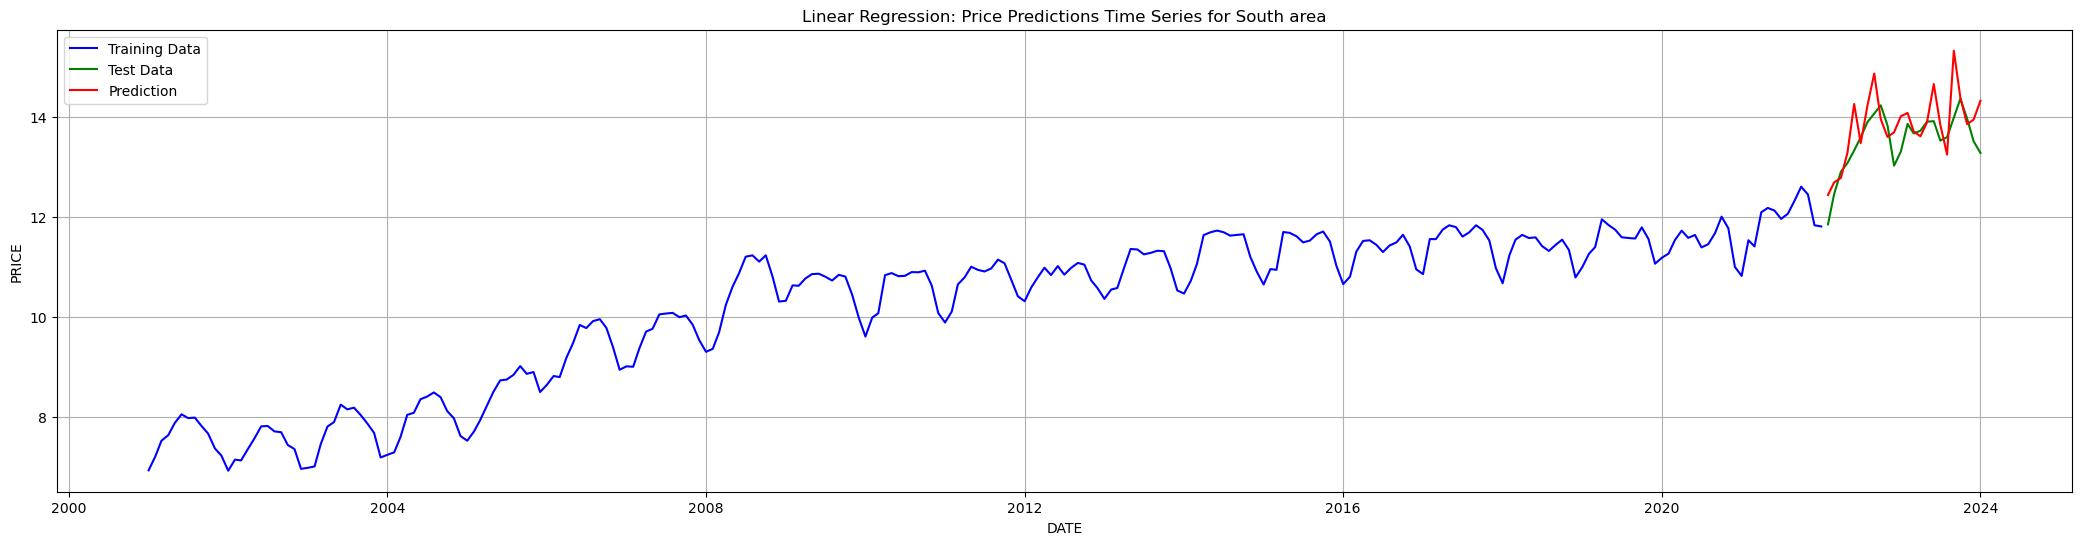

Random Forest Evaluation Metrics:
R2 Score: -7.3171704927065715
Mean Absolute Percentage Error: 0.11394107298985888
Mean Absolute Error: 1.554507222222217
Mean Squared Error: 2.6055978325370215
Root Mean Squared Error: 1.6141864305392428



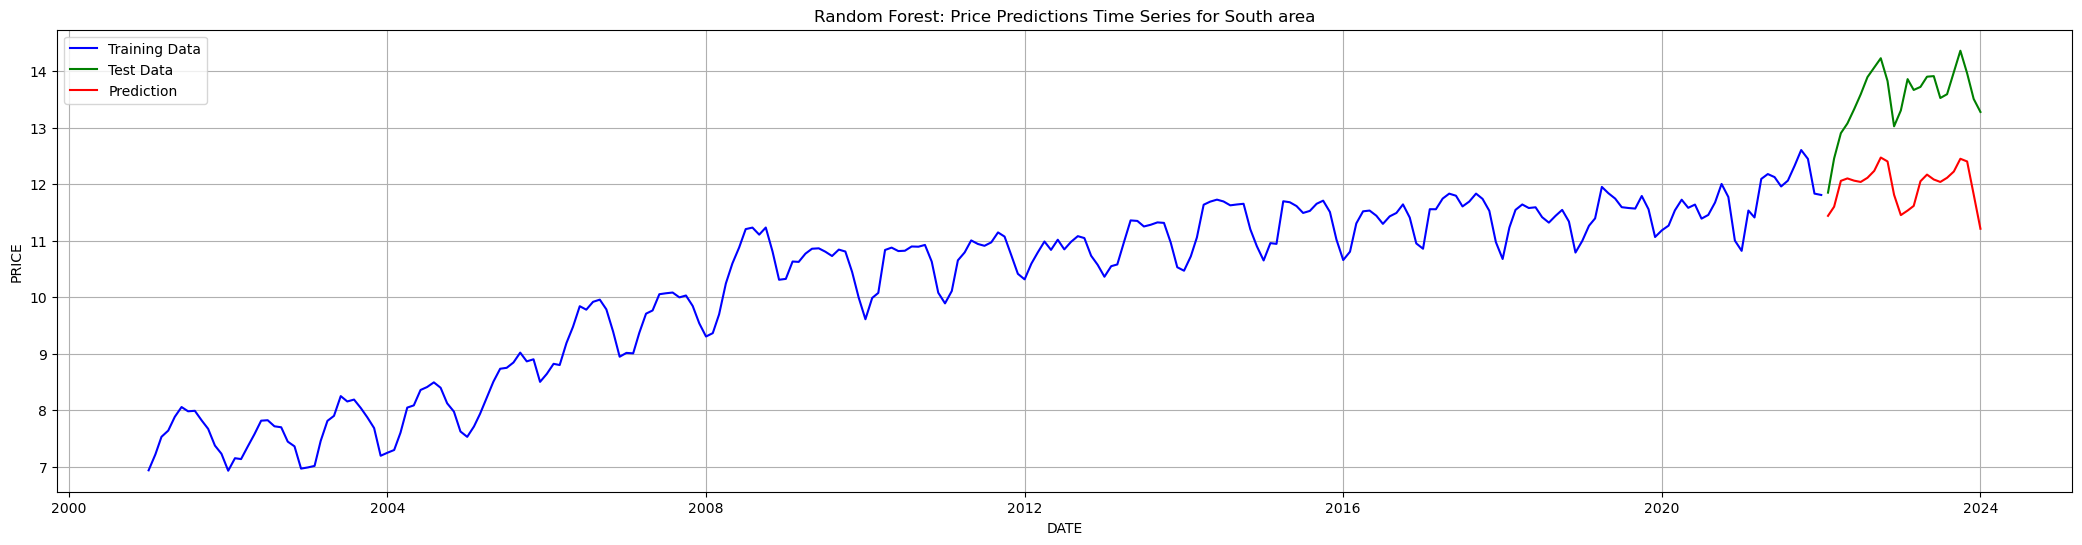

XGBoost Evaluation Metrics:
R2 Score: -5.258787117290839
Mean Absolute Percentage Error: 0.09697708075970324
Mean Absolute Error: 1.3263553618325128
Mean Squared Error: 1.9607488101180834
Root Mean Squared Error: 1.4002674066470602



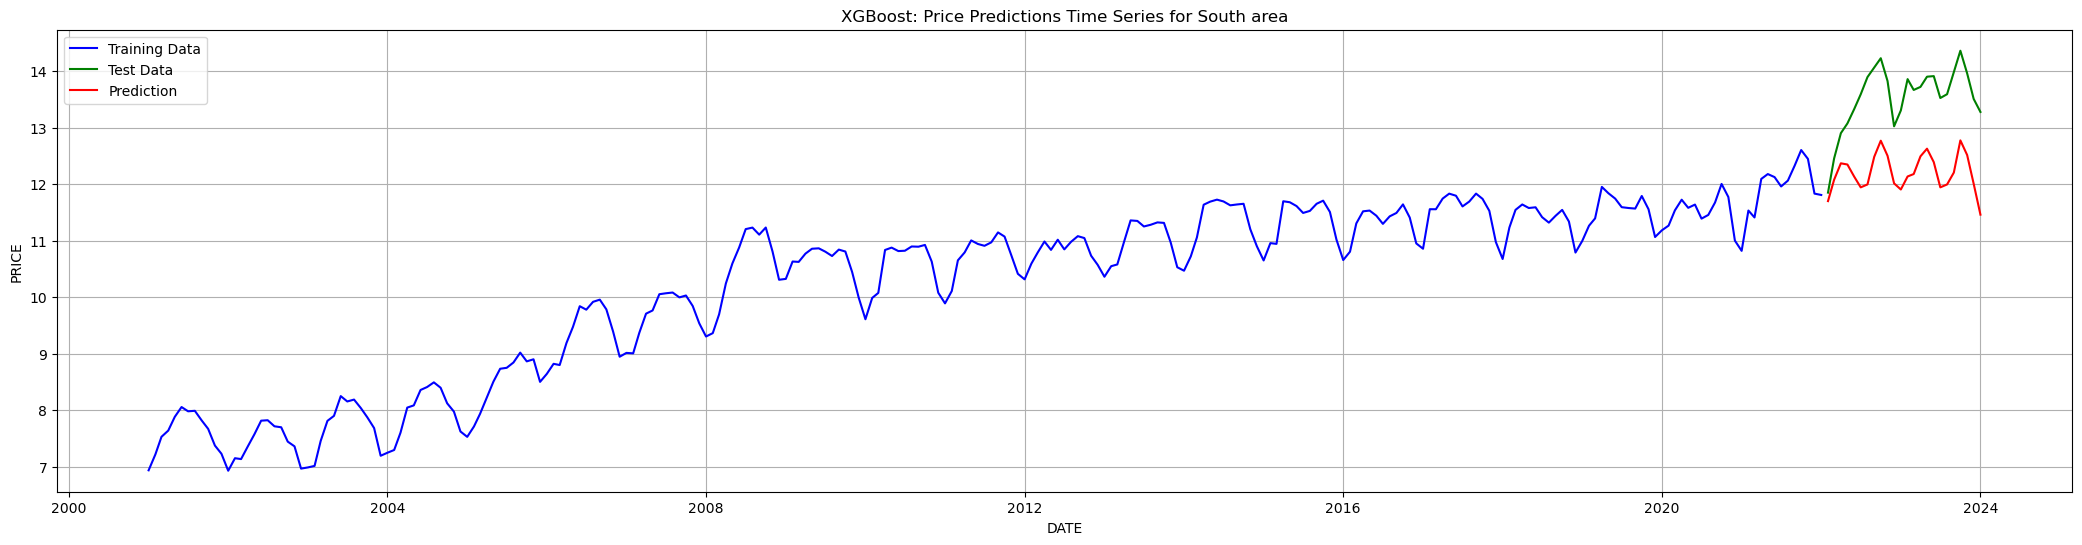

MultiLayer Perceptron Evaluation Metrics:
R2 Score: -6.902264064090826
Mean Absolute Percentage Error: 0.10905647846032081
Mean Absolute Error: 1.494304089638084
Mean Squared Error: 2.475616212939963
Root Mean Squared Error: 1.5734091053950219



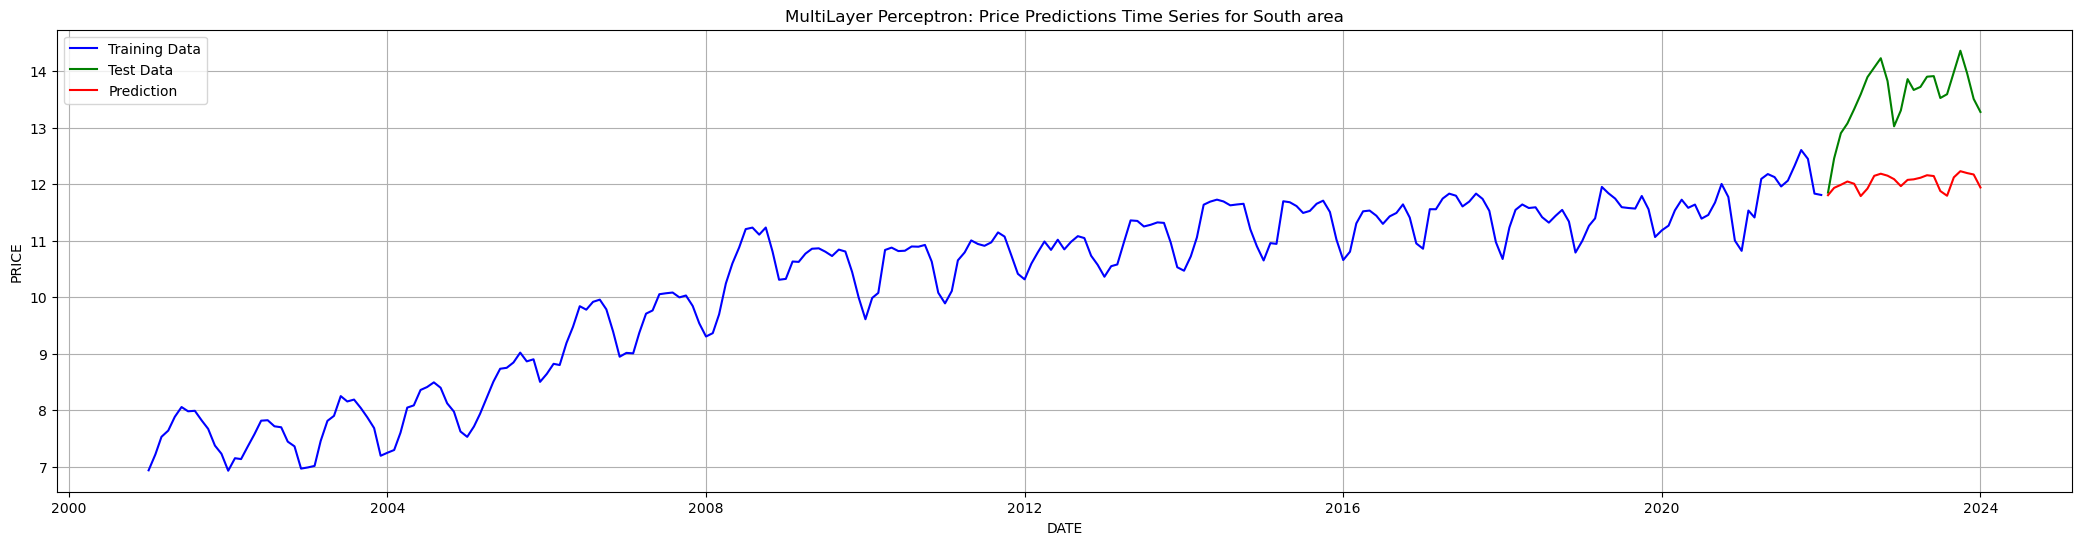

In [36]:
train_visualization = 0 
data_handling_outlier['year_month'] = pd.to_datetime(data_handling_outlier[['year', 'month']].assign(day=1)).dt.to_period('M')
data_handle_outliers = data_handling_outlier.copy()

result = [predictions_linear, predictions_rf , predictions_xgb,predictions_mlp]
for i in range(len(result)):
    
    train_data = data_handle_outliers.iloc[:len(data_handle_outliers)-split_time, :]
    train_data = train_data[["year_month", "price"]]

    test_data = data_handle_outliers.iloc[len(data_handle_outliers)-split_time:, :]
    test_data = test_data[["year_month", "price"]]

    prediction = test_data["year_month"]
    prediction = pd.DataFrame({"year_month": prediction, "Prediction": result[i] })
    
    train_data["year_month"] = train_data["year_month"].dt.to_timestamp()
    test_data["year_month"] = test_data["year_month"].dt.to_timestamp()
    prediction["year_month"] = prediction["year_month"].dt.to_timestamp()
    
    if result[i] == predictions_linear:
        print("Linear Regression Evaluation Metrics:")
        
    elif result[i] == predictions_rf:
        print("Random Forest Evaluation Metrics:")
    
    elif result[i] == predictions_xgb:
        print("XGBoost Evaluation Metrics:")

    elif result[i] == predictions_mlp:
        print("MultiLayer Perceptron Evaluation Metrics:")
        
        
        
    y_true = test_data["price"]
    y_pred = prediction["Prediction"]
    print(f"R2 Score: {r2_score(y_true, y_pred)}")
    print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_true, y_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred)}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print()
    
    
    plt.figure(figsize=(26, 6))
    plt.plot(train_data["year_month"].iloc[train_visualization:], train_data["price"].iloc[train_visualization:], label="Training Data", color="blue")
    plt.plot(test_data["year_month"], test_data["price"], label="Test Data", color="green")
    plt.plot(prediction["year_month"], prediction["Prediction"], label="Prediction", color="red")
    
    
    if result[i] == predictions_linear:
        plt.title(f"Linear Regression: Price Predictions Time Series for {area} area")
        
    elif result[i] == predictions_rf:
        plt.title(f"Random Forest: Price Predictions Time Series for {area} area")
    
    elif result[i] == predictions_xgb:
        plt.title(f"XGBoost: Price Predictions Time Series for {area} area")
        
    elif result[i] == predictions_mlp:
        plt.title(f"MultiLayer Perceptron: Price Predictions Time Series for {area} area")
        
    
    plt.xlabel("DATE")
    plt.ylabel("PRICE")
    plt.legend()
    plt.grid(True)
    plt.show()

## **Conclusion**

**The Linear Regression (LR) model developed for forecasting electricity demand in the South US region demonstrates strong predictive accuracy. This is supported by its perfromance metrics**, with a Mean Absolute Percentage Error (MAPE) of 3.07%, a Mean Absolute Error (MAE) of 0.41, and a Mean Squared Error (MSE) of 0.29. These performance indicators show that LR fits the observed electricity consumption data closely and performs better than the other algorithms evaluated, making it a reliable choice for this forecasting task.